# <font color='CC3D3D'> Original Data Clansing
    
### 1. Outlier preprocessing
- <span style="color:green">**user_spec.csv, loan_result, log_data.csv** </span>에 대하여 각 열에 대해 이상치 처리

### 2. MissingValue Preprocessing
- <span style="color:green">**user_spec.csv, loan_result, log_data.csv** </span>에 대하여 각 열에 대해 결측치 처리
    
### 3. Deployment CSV
- 결측치 처리된 데이터에 대해 <span style="color:blue">**user_spec_clansing.csv, loan_result_clansing, log_data_clansing.csv** </span>로 생성

# Import

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from pycaret.classification import *

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

plt.rc("font", family = 'Malgun Gothic')
plt.rcParams["figure.figsize"] = (12,8)

# Data Load

In [2]:
data_root = '../Data/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908'

In [3]:
user_spec = pd.read_csv(data_root+'/user_spec.csv')
loan_result = pd.read_csv(data_root+'/loan_result.csv')
log_data = pd.read_csv(data_root+'/log_data.csv')

In [4]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [5]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [6]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [7]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [8]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [9]:
log_data.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

# Data Preprocessing

## Application_id

In [10]:
app_id = loan_result.application_id.unique().tolist()

In [11]:
user_spec = user_spec[user_spec['application_id'].isin(app_id)].reset_index(drop=True)

In [12]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
3,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
4,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
968749,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
968750,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
968751,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


## User_id

In [13]:
user_id = user_spec.user_id.unique().tolist()

In [14]:
log_data = log_data[log_data['user_id'].isin(user_id)].reset_index(drop=True)

In [15]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
14344017,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
14344018,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
14344019,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
14344020,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


## Data split

In [16]:
user_spec['month'] = user_spec['insert_time'].apply(lambda x: int(x[5:7]))
loan_result['month'] = loan_result['loanapply_insert_time'].apply(lambda x: int(x[5:7]))
log_data['month'] = log_data['timestamp'].apply(lambda x: int(x[5:7]))

In [17]:
user_spec_train = user_spec[user_spec['month'] <6].reset_index(drop=True)
loan_result_train = loan_result[loan_result['month'] <6].reset_index(drop=True)
log_data_train = log_data[log_data['month'] <6].reset_index(drop=True)

user_spec_test = user_spec[user_spec['month'] ==6].reset_index(drop=True)
loan_result_test = loan_result[loan_result['month'] ==6].reset_index(drop=True)
log_data_test = log_data[log_data['month'] ==6].reset_index(drop=True)

In [18]:
user_spec_train = user_spec_train.drop(['month'],axis=1)
loan_result_train = loan_result_train.drop(['month'],axis=1)
log_data_train = log_data_train.drop(['month'],axis=1)

user_spec_test = user_spec_test.drop(['month'],axis=1)
loan_result_test = loan_result_test.drop(['month'],axis=1)
log_data_test= log_data_test.drop(['month'],axis=1)

user_spec = user_spec.drop(['month'],axis=1)
loan_result = loan_result.drop(['month'],axis=1)
log_data = log_data.drop(['month'],axis=1)

In [19]:
print(user_spec_train.shape)
display(user_spec_train.head())

(728884, 17)


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,전월세,25000000.0,대환대출,0.0,0.0,3.0,76000000.0
1,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,201803.0,정규직,전월세,40000000.0,대환대출,0.0,NaN,4.0,142000000.0
2,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,201901.0,정규직,전월세,13000000.0,대환대출,0.0,NaN,3.0,36000000.0
3,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,202204.0,정규직,전월세,50000000.0,주택구입,0.0,0.0,NaN,NaN
4,675491,848534,1984.0,1.0,2022-04-20 15:44:42,580.0,50000000.0,EARNEDINCOME,202012.0,정규직,전월세,50000000.0,생활비,NaN,NaN,5.0,71000000.0


In [20]:
print(user_spec_test.shape)
display(user_spec_test.head())

(239869, 17)


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
1,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
2,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
3,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
4,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0


In [21]:
print(loan_result_train.shape)
display(loan_result_train.head())

(10270124, 7)


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0


In [22]:
print(loan_result_test.shape)
display(loan_result_test.head())

(3257239, 7)


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [23]:
print(log_data_train.shape)
display(log_data_train.head())

(10378704, 6)


,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [24]:
print(log_data_test.shape)
display(log_data_test.head())

(3965318, 6)


,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,17516,EndLoanApply,2022-06-26 11:06:49,Android,3.15.0,2022-06-26
1,195705,OpenApp,2022-06-26 11:29:27,Android,3.12.1,2022-06-26
2,195705,Login,2022-06-26 11:29:34,Android,3.12.1,2022-06-26
3,743379,OpenApp,2022-06-26 11:33:09,Android,3.15.1,2022-06-26
4,855546,OpenApp,2022-06-26 11:34:23,Android,3.14.0,2022-06-26


## Outlier

### Credit Score

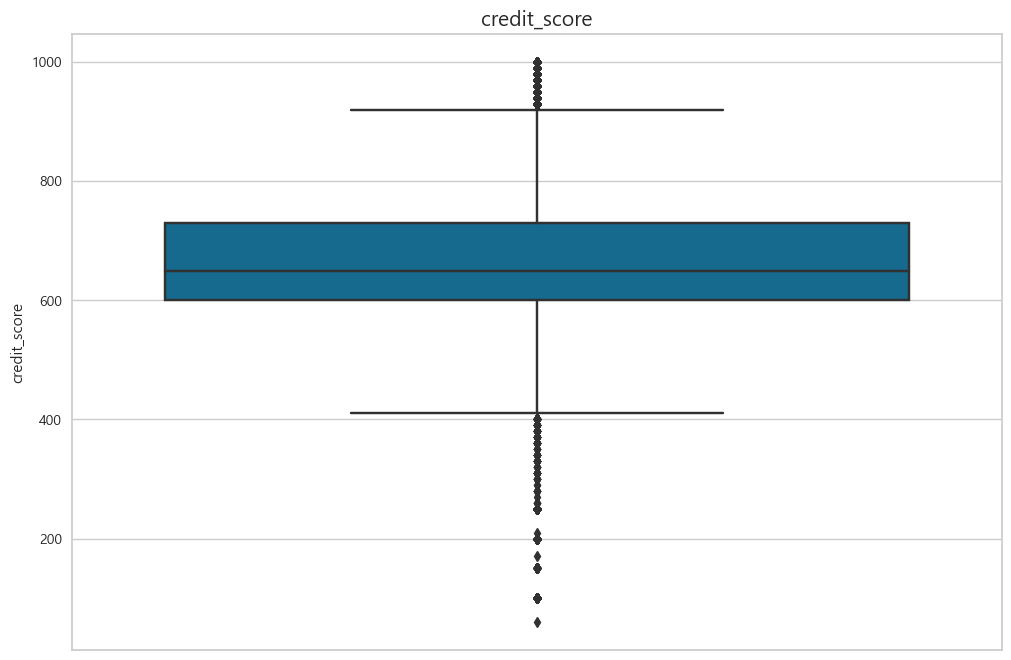

In [25]:
sns.boxplot(y = 'credit_score', data = user_spec)
plt.title('credit_score', size = 15)
plt.show()

- 아무것도 안하고 넘어가기

### yearly_income

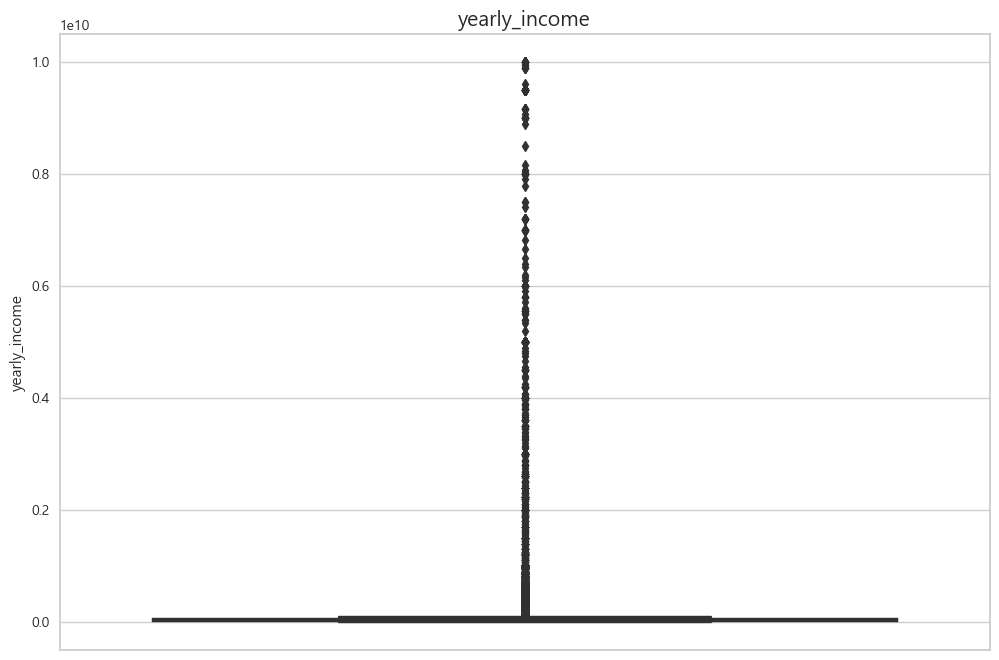

In [26]:
sns.boxplot(y = 'yearly_income', data = user_spec)
plt.title('yearly_income', size = 15)
plt.show()

- 아무것도 안하고 넘어가기

### company_enter_month

In [27]:
## 근속연수
def company_enter_year(x):
    if x > 10000000:
        return x // 10000
    elif x > 100000:
        return x // 100

def company_enter_month(x):
    if x > 10000000:
        return (x % 10000) // 100
    elif x > 100000:
        return x % 100
    
user_spec['enter_year'] = user_spec['company_enter_month'].map(company_enter_year)
user_spec['enter_month'] = user_spec['company_enter_month'].map(company_enter_month)
user_spec_train['enter_year'] = user_spec_train['company_enter_month'].map(company_enter_year)
user_spec_train['enter_month'] = user_spec_train['company_enter_month'].map(company_enter_month)
user_spec[['user_id', 'enter_year', 'enter_month']].head()

,user_id,enter_year,enter_month
0,553686,2007.0,2.0
1,59516,2021.0,9.0
2,167320,2017.0,1.0
3,33400,2021.0,9.0
4,860410,NaN,NaN


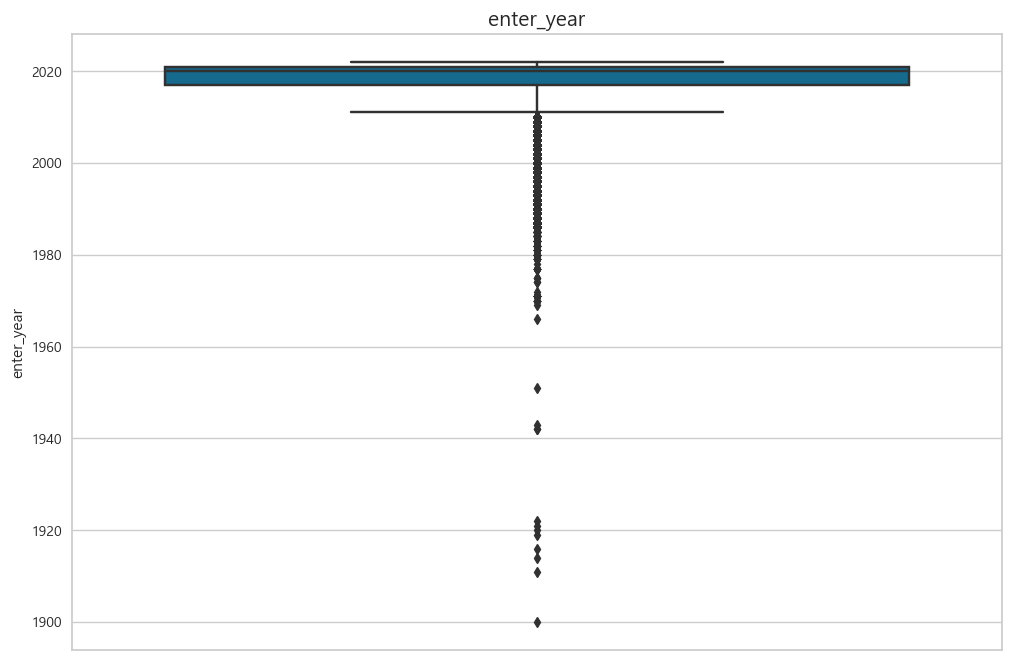

In [28]:
sns.boxplot(y = 'enter_year', data = user_spec)
plt.title('enter_year', size = 15)
plt.show()

In [29]:
user_spec['enter_birth'] = pd.to_numeric(user_spec['enter_year']) - user_spec['birth_year']
user_spec_train['enter_birth'] = pd.to_numeric(user_spec_train['enter_year']) - user_spec_train['birth_year']

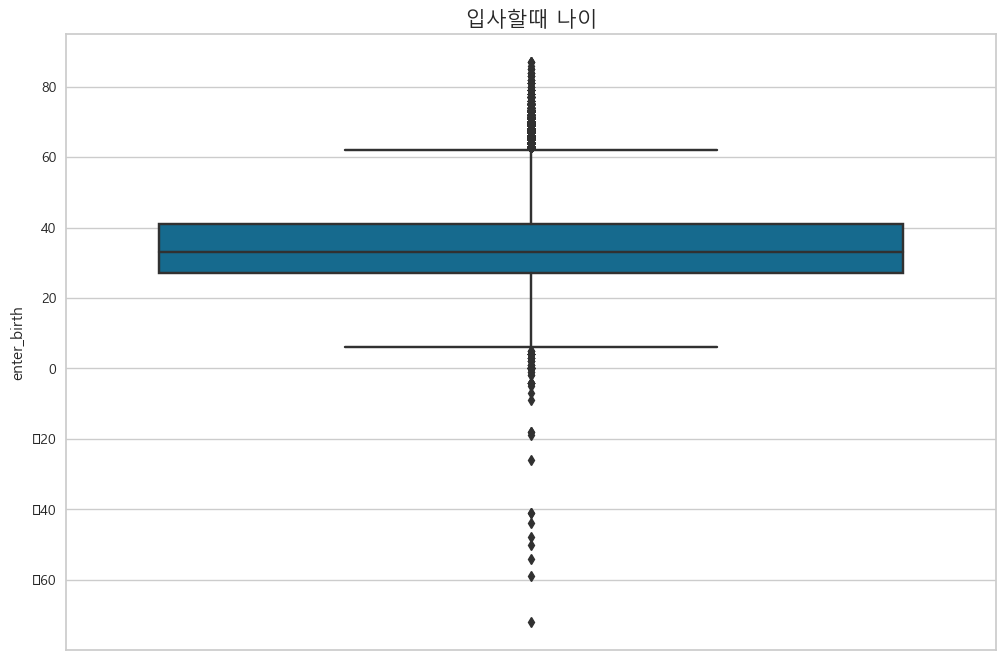

In [30]:
sns.boxplot(y = 'enter_birth', data = user_spec)
plt.title('입사할때 나이', size = 15)
plt.show()

In [31]:
user_spec.loc[user_spec['enter_birth']<15,'enter_year'] = user_spec.loc[user_spec['enter_birth']<15,'birth_year']+user_spec_train['enter_birth'].median() 
user_spec.loc[user_spec['enter_year']>2022,'enter_year'] = 2021
user_spec.loc[user_spec['enter_birth']<15,'enter_birth'] = 15

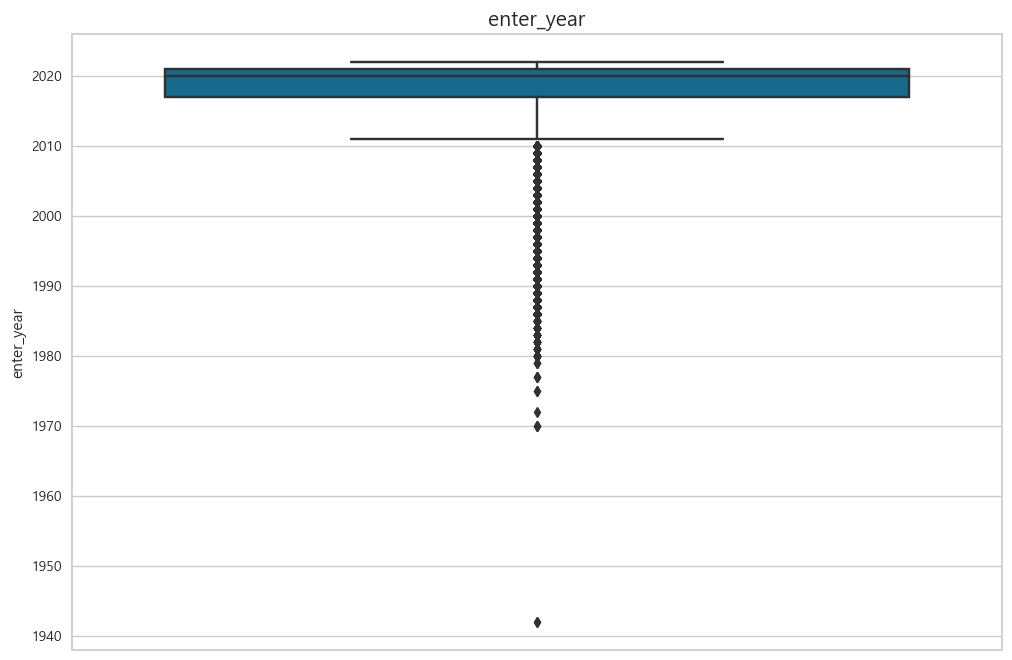

In [32]:
sns.boxplot(y = 'enter_year', data = user_spec)
plt.title('enter_year', size = 15)
plt.show()

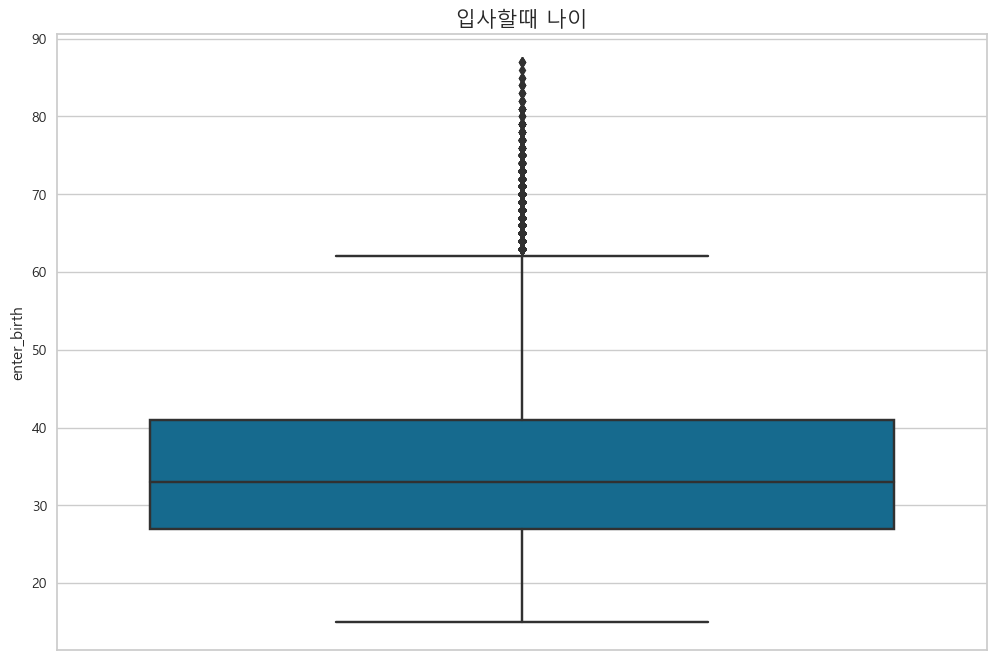

In [33]:
sns.boxplot(y = 'enter_birth', data = user_spec)
plt.title('입사할때 나이', size = 15)
plt.show()

### desired_amount

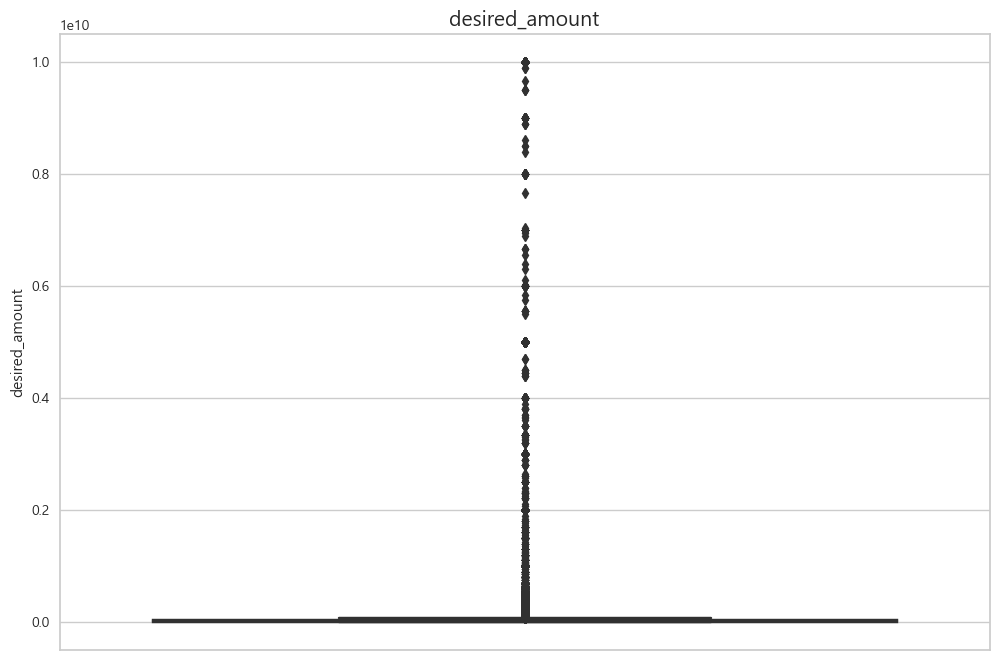

In [34]:
sns.boxplot(y = 'desired_amount', data = user_spec)
plt.title('desired_amount', size = 15)
plt.show()

- 아무것도 안하고 넘어가기

### existing_loan_cnt

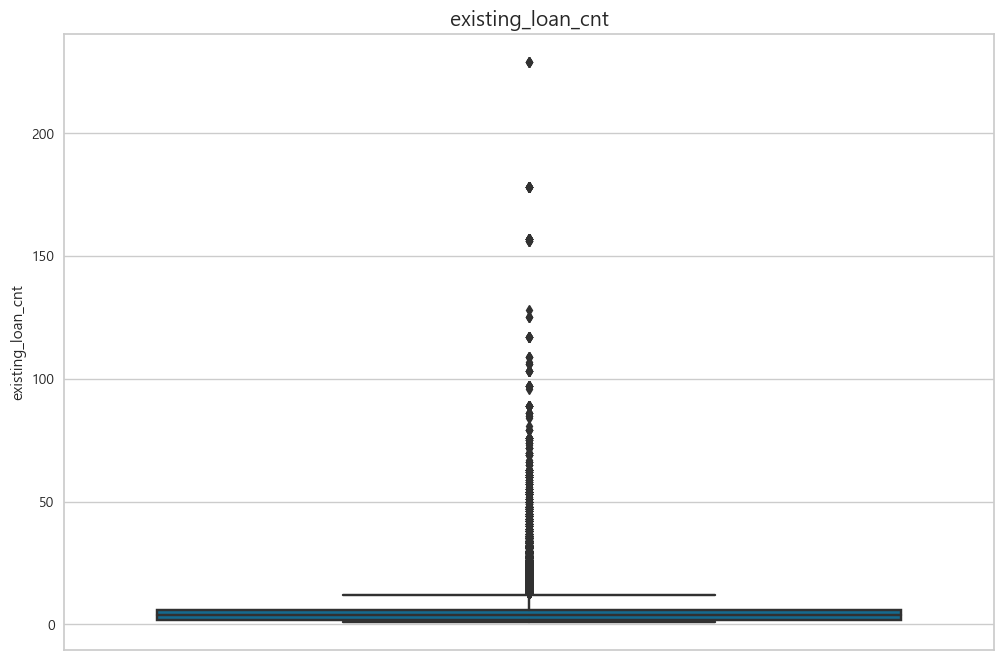

In [35]:
sns.boxplot(y = 'existing_loan_cnt', data = user_spec)
plt.title('existing_loan_cnt', size = 15)
plt.show()

In [36]:
user_spec['existing_loan_cnt'].mean()

4.500601242852262

In [37]:
user_spec['existing_loan_cnt'].max()

229.0

- 기대출수 150개 이상 -> 냅두기

### existing_loan_amt

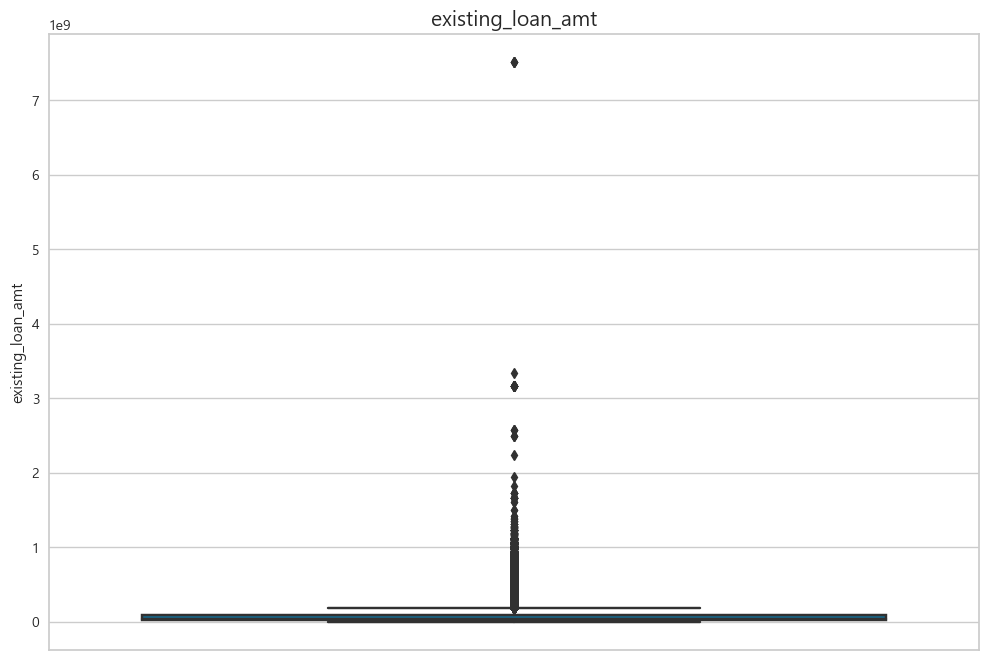

In [38]:
sns.boxplot(y = 'existing_loan_amt', data = user_spec)
plt.title('existing_loan_amt', size = 15)
plt.show()

- 아무것도 안하기로 함

## Missing_value

### Data Split

In [39]:
user_spec['month'] = user_spec['insert_time'].apply(lambda x: int(x[5:7]))
loan_result['month'] = loan_result['loanapply_insert_time'].apply(lambda x: int(x[5:7]))
log_data['month'] = log_data['timestamp'].apply(lambda x: int(x[5:7]))

In [40]:
user_spec_train = user_spec[user_spec['month'] <6].reset_index(drop=True)
loan_result_train = loan_result[loan_result['month'] <6].reset_index(drop=True)
log_data_train = log_data[log_data['month'] <6].reset_index(drop=True)

user_spec_test = user_spec[user_spec['month'] ==6].reset_index(drop=True)
loan_result_test = loan_result[loan_result['month'] ==6].reset_index(drop=True)
log_data_test = log_data[log_data['month'] ==6].reset_index(drop=True)

### Missing Value Check

In [41]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
birth_year                               8593
gender                                   8593
insert_time                                 0
credit_score                            81769
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                              92314
enter_month                             92314
enter_birth                             99428
month                                       0
dtype: int64

In [42]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
month                          0
dtype: int64

In [43]:
log_data.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                377
mp_app_version    550049
date_cd                0
month                  0
dtype: int64

### Birth_year & gender

In [44]:
birth_gender = user_spec.groupby(['user_id','birth_year','gender'],as_index=False).count().reset_index(drop=True).iloc[:,:3]
birth_gender

,user_id,birth_year,gender
0,9,1996.0,1.0
1,11,1997.0,1.0
2,14,1965.0,0.0
3,17,1993.0,1.0
4,19,1987.0,0.0
...,...,...,...
312508,879692,1992.0,1.0
312509,879693,2001.0,0.0
312510,879695,1996.0,1.0
312511,879696,1997.0,1.0


In [45]:
user_spec = user_spec.drop(['birth_year','gender'],axis=1)
user_spec = pd.merge(user_spec,birth_gender,how='left',on='user_id')

In [46]:
user_spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,enter_year,enter_month,enter_birth,month,birth_year,gender
0,954900,553686,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,2007.0,2.0,39.0,6,1968.0,1.0
1,137274,59516,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0,2021.0,9.0,24.0,6,1997.0,1.0
2,1570936,167320,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0,2017.0,1.0,28.0,6,1989.0,1.0
3,967833,33400,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,2021.0,9.0,21.0,6,2000.0,1.0
4,1614045,860410,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0,NaN,NaN,NaN,6,1976.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1864587,489900,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN,2021.0,6.0,21.0,3,2000.0,1.0
968749,1327066,151422,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3,1955.0,1.0
968750,1319606,173524,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0,2009.0,8.0,26.0,3,1983.0,1.0
968751,1482466,766546,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0,2017.0,5.0,42.0,3,1975.0,1.0


In [47]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            81769
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                              92314
enter_month                             92314
enter_birth                             99428
month                                       0
birth_year                               6891
gender                                   6891
dtype: int64

In [48]:
bg_id = user_spec[user_spec.gender.isna()].application_id.unique().tolist()

### Birth_year

In [49]:
loan_result[loan_result['application_id'].isin(bg_id)]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,month
4260,368880,2022-06-07 14:51:54,1,61,63000000.0,15.4,NaN,6
4261,368880,2022-06-07 14:51:53,30,121,20000000.0,14.3,NaN,6
4262,368880,2022-06-07 14:52:15,55,186,24000000.0,11.6,NaN,6
4263,368880,2022-06-07 14:51:54,32,56,15000000.0,15.8,NaN,6
4264,368880,2022-06-07 14:51:55,34,243,28000000.0,18.8,NaN,6
...,...,...,...,...,...,...,...,...
13526083,191834,2022-06-03 14:20:53,35,29,2000000.0,19.4,NaN,6
13526084,191834,2022-06-03 14:20:42,59,150,22000000.0,16.4,NaN,6
13526085,191834,2022-06-03 14:20:43,35,168,13000000.0,19.4,NaN,6
13526086,191834,2022-06-03 14:20:44,58,175,16000000.0,13.8,NaN,6


In [50]:
def age(x):
    if x > 2004:
        return 10
    elif x > 1994:
        return 20
    elif x > 1984:
        return 30
    elif x > 1974:
        return 40
    elif x > 1964:
        return 50
    elif x > 1954:
        return 60
    elif x > 1944:
        return 70
    elif x > 1934:
        return 80
    elif x > 1924:
        return 90
    else:
        return np.nan

In [51]:
user_spec_train['age'] = user_spec_train.birth_year.apply(lambda x : age(x))

In [52]:
user_spec['age'] = user_spec.birth_year.apply(lambda x : age(x))

In [53]:
lab_df = user_spec_train[['age','credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']]

In [54]:
lab_df1 = lab_df.groupby('age')[['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']].mean()
lab_df1

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt
age,,,,,
20.0,657.417245,2.895319e+07,2.141487e+07,3.501217,3.260615e+07
30.0,674.987638,3.995539e+07,3.532712e+07,4.329993,6.769406e+07
40.0,674.919001,4.938365e+07,3.901918e+07,4.852480,9.400945e+07
50.0,670.245368,5.958612e+07,3.925237e+07,4.956305,9.173035e+07
60.0,674.318777,4.708209e+07,3.618451e+07,4.803957,7.125581e+07
70.0,689.375000,3.824627e+07,2.527701e+07,5.191629,5.918268e+07
80.0,710.346715,3.342415e+07,2.220177e+07,4.294340,4.427854e+07
90.0,728.148148,2.213333e+07,8.833333e+06,3.526316,7.882353e+06


In [55]:
user_id = user_spec[user_spec.birth_year.isna()].user_id.values.tolist()

In [56]:
feature_list = ['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']

In [57]:
age_list=[20,30,40,50,60,70,80,90]
def age_feature(x,feature):
    diff = []
    for i in feature:
        diff.append(abs(i-x))
    idx = diff.index(np.min(diff))
    return age_list[idx]

In [58]:
for idd in tqdm(user_id):
    user_birth_list = []
    for f in feature_list:
        x = np.mean(user_spec[user_spec.user_id == idd][f'{f}'].fillna(0).tolist())
        feature = lab_df1[f'{f}'].values.tolist()
        user_birth_list.append(age_feature(x,feature))
    age = int(np.mean(user_birth_list))
    missing_value = 2022-age
    user_spec.loc[user_spec.user_id == idd,'birth_year'] = missing_value

100%|█████████████████████████████████████████████████████████████████████████████| 6891/6891 [00:48<00:00, 142.71it/s]


In [59]:
user_spec.drop('age',axis=1,inplace=True)

In [60]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            81769
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                              92314
enter_month                             92314
enter_birth                             99428
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

In [61]:
user_spec.birth_year.value_counts()

1982.0    38223
1981.0    35571
1992.0    35543
1983.0    34806
1991.0    34454
1980.0    34017
1993.0    34007
1984.0    32231
1979.0    31680
1990.0    31679
1985.0    31678
1994.0    31574
1995.0    31401
1986.0    30244
1987.0    30238
1989.0    30180
1988.0    30073
1996.0    26684
1978.0    25075
1977.0    24654
1976.0    23508
1997.0    23398
1974.0    22630
1975.0    22360
1973.0    21086
1972.0    19142
1971.0    18580
1998.0    17368
1970.0    16871
1969.0    15538
1999.0    13921
1968.0    13742
1967.0    11006
2000.0    10447
1966.0     9723
1965.0     8488
1964.0     7759
1962.0     6673
1963.0     6406
2001.0     5954
1960.0     5918
1961.0     5455
1959.0     4291
1958.0     3732
1957.0     2939
2002.0     2391
1956.0     2362
1955.0     2163
1954.0     2042
1952.0     1479
1953.0     1292
1946.0      853
1950.0      848
1951.0      805
2003.0      668
1948.0      631
1949.0      531
1947.0      430
1945.0      256
1944.0      242
1942.0      176
1943.0      173
1941.0  

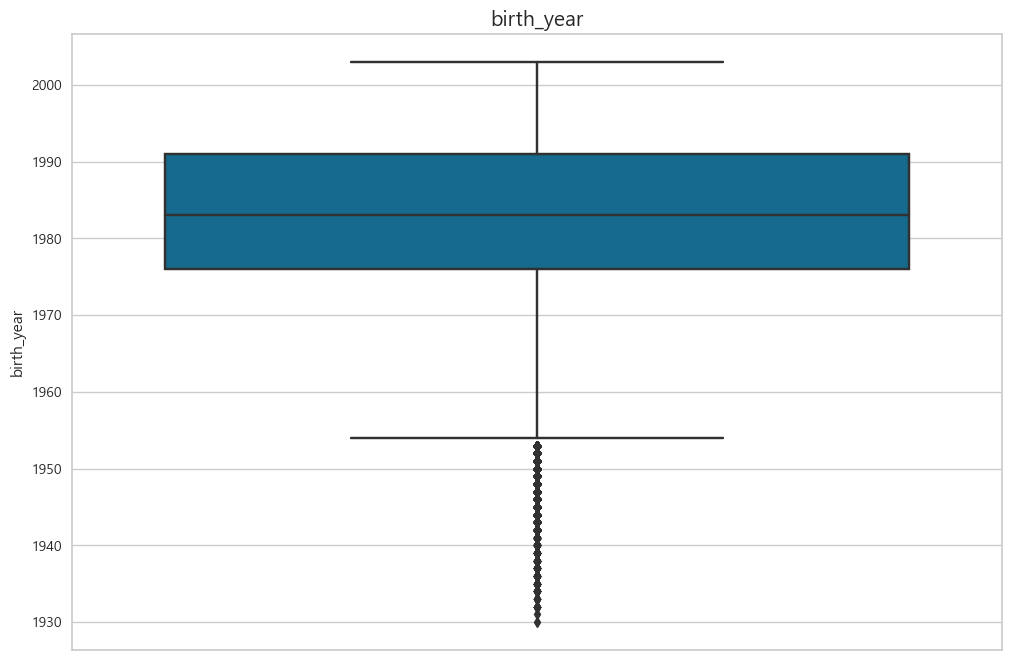

In [62]:
sns.boxplot(y = 'birth_year', data = user_spec)
plt.title('birth_year', size = 15)
plt.show()

### Credit_score

In [63]:
# credit_score가 nan인 User_id

user_id = user_spec[user_spec.credit_score.isna()].user_id

In [64]:
# credit_score가 nan값인 user의 credit score unique 갯수

cs_df = user_spec[user_spec['user_id'].isin(user_id)].groupby('user_id')['credit_score'].nunique().reset_index() ; cs_df

,user_id,credit_score
0,14,0
1,19,0
2,41,1
3,48,1
4,74,0
...,...,...
58674,879634,0
58675,879685,0
58676,879688,0
58677,879695,0


- 1이면 자기 자신으로 채움  
- 2이상이면 보간
- 0은 어떻게

In [65]:
cs_df_id = cs_df.user_id.to_list()

In [66]:
for idd in tqdm(cs_df_id):
    if cs_df[cs_df.user_id == idd].credit_score.values[0] == 1:
        miss_list = user_spec[user_spec.user_id == idd]['credit_score'].unique().tolist()
        miss = [x for x in miss_list if pd.isnull(x) == False][0]
        user_spec[user_spec.user_id == idd] = user_spec[user_spec.user_id == idd].fillna({'credit_score':miss})
    elif cs_df[cs_df.user_id == idd].credit_score.values[0] > 1:
        user_spec.loc[user_spec.user_id == idd, 'credit_score'] = user_spec[user_spec.user_id == idd].sort_values(['credit_score']).loc[user_spec.user_id == idd, 'credit_score'].fillna(method='ffill')
        user_spec.loc[user_spec.user_id == idd, 'credit_score'] = user_spec[user_spec.user_id == idd].sort_values(['credit_score']).loc[user_spec.user_id == idd, 'credit_score'].fillna(method='bfill')
    else:
        pass
        

100%|███████████████████████████████████████████████████████████████████████████| 58679/58679 [01:14<00:00, 782.72it/s]


In [67]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               1
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                              92314
enter_month                             92314
enter_birth                             99428
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

- 나머지 값들은 knn Imputer로 처리

### yearly_income

In [68]:
user_spec[user_spec.yearly_income.isna()]

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,enter_year,enter_month,enter_birth,month,birth_year,gender
415357,341149,670502,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,NaN,NaN,NaN,6,1981.0,1.0


In [69]:
user_spec[user_spec.user_id == 670502]

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,enter_year,enter_month,enter_birth,month,birth_year,gender
393331,1746224,670502,2022-06-30 22:41:11,930.0,0.0,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,NaN,NaN,NaN,6,1981.0,1.0
415357,341149,670502,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,NaN,NaN,NaN,6,1981.0,1.0


In [70]:
user_spec.yearly_income.fillna(0,inplace=True)

In [71]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
company_enter_month                     92314
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                              92314
enter_month                             92314
enter_birth                             99428
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

### Company_enter_month

In [72]:
user_spec.drop(['company_enter_month'],axis=1,inplace=True)

- enter year 5년 단위로 중앙
- enter month 5년 단위로 중앙

#### enter_year

- enter_year를 들어간 나이로 바꿈
- 그 이후에 birth_year와 같은 방식으로 처리
- 해당 나이를 birth_year에 더하기
- 이후 2022년 넘는 것을 처리

In [73]:
user_spec.enter_birth = user_spec.enter_year - user_spec.birth_year

In [74]:
def enter_age(x):
    if x > 90:
        return 90
    elif x > 85:
        return 85
    elif x > 80:
        return 80
    elif x > 75:
        return 75
    elif x > 70:
        return 70
    elif x > 65:
        return 65
    elif x > 60:
        return 60
    elif x > 55:
        return 55
    elif x > 50:
        return 50
    elif x > 45:
        return 45
    elif x > 40:
        return 40
    elif x > 35:
        return 35
    elif x > 30:
        return 30
    elif x > 25:
        return 25
    elif x > 20:
        return 20
    elif x > 15:
        return 15
    elif x > 10:
        return 10
    else:
        return np.nan

In [75]:
user_spec_train['enter_age'] = user_spec_train.enter_birth.apply(lambda x : enter_age(x))

In [76]:
user_spec['enter_age'] = user_spec.enter_birth.apply(lambda x : enter_age(x))

In [77]:
lab_df = user_spec_train[['enter_age','credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']]

In [78]:
lab_df1 = lab_df.groupby('enter_age')[['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']].mean()
lab_df1

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt
enter_age,,,,,
10.0,700.396476,1.802162e+08,6.724324e+07,4.083333,8.150000e+07
15.0,674.235415,4.832597e+07,3.166094e+07,4.580959,8.776464e+07
20.0,666.544187,4.365129e+07,3.221169e+07,4.359892,7.146314e+07
25.0,675.730827,4.552838e+07,3.709679e+07,4.589030,8.173685e+07
30.0,678.303698,4.571831e+07,3.999636e+07,4.567256,8.529000e+07
35.0,670.528771,4.902173e+07,3.694254e+07,4.556442,8.482858e+07
40.0,664.746224,4.876196e+07,3.354689e+07,4.640788,7.907058e+07
45.0,662.074221,4.821837e+07,3.496127e+07,4.538454,7.658089e+07
50.0,661.574123,4.904413e+07,3.939689e+07,4.544116,6.920438e+07


In [79]:
user_id = user_spec[user_spec.enter_year.isna()].user_id.values.tolist()

In [80]:
feature_list = ['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']

In [81]:
age_list=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
def age_feature(x,feature):
    diff = []
    for i in feature:
        diff.append(abs(i-x))
    idx = diff.index(np.min(diff))
    return age_list[idx]

In [82]:
for idd in tqdm(user_id):
    user_enter_list = []
    for f in feature_list:
        x = np.mean(user_spec[user_spec.user_id == idd][f'{f}'].fillna(0).tolist())
        feature = lab_df1[f'{f}'].values.tolist()
        user_enter_list.append(age_feature(x,feature))
    age = int(np.mean(user_enter_list))
    missing_value = np.unique(user_spec[user_spec.user_id == idd]['birth_year'].values)[0]+age
    if missing_value > 2022:
        missing_value = 2021
    else:
        pass
    user_spec.loc[user_spec.user_id == idd,'enter_year'] = missing_value

100%|███████████████████████████████████████████████████████████████████████████| 92314/92314 [11:55<00:00, 129.01it/s]


In [83]:
user_spec.drop('enter_age',axis=1,inplace=True)

In [84]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                                  0
enter_month                             92314
enter_birth                             92314
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

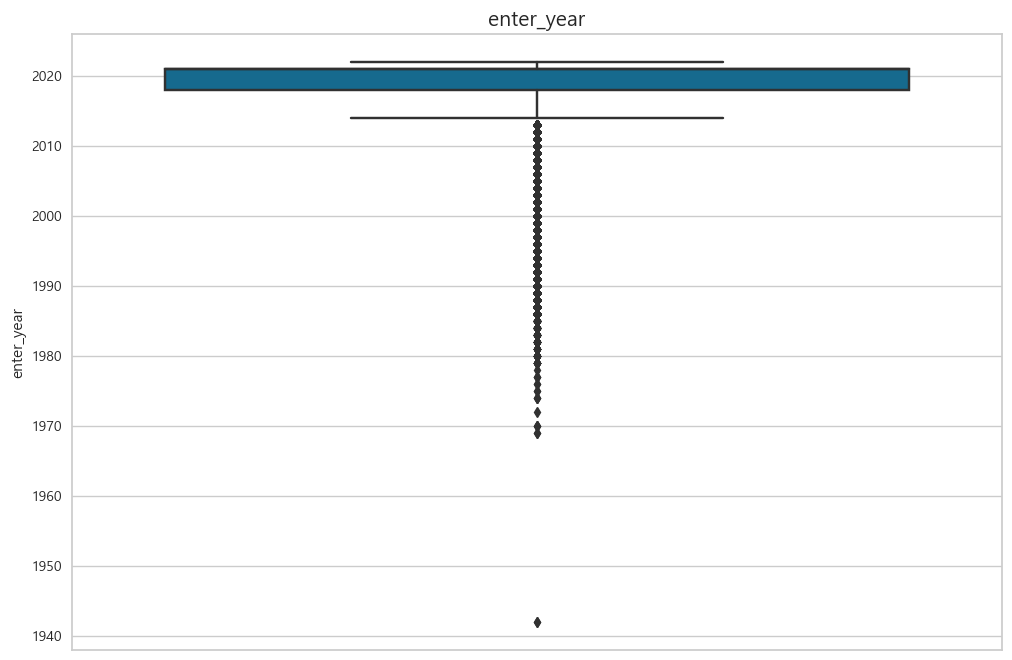

In [85]:
sns.boxplot(y = 'enter_year', data = user_spec)
plt.title('enter_year', size = 15)
plt.show()

In [86]:
user_spec.enter_year.value_counts()

2021.0    351490
2022.0    133616
2020.0    112109
2019.0     78735
2018.0     55281
2017.0     40388
2016.0     31603
2015.0     23761
2014.0     18043
2013.0     16864
2012.0     14645
2011.0     13130
2010.0     11521
2009.0      7986
2008.0      6876
2007.0      6472
2006.0      6142
2005.0      5161
2004.0      4694
2003.0      4089
2002.0      3805
2000.0      3342
2001.0      2849
1999.0      2640
1996.0      2047
1997.0      1835
1995.0      1830
1998.0      1202
1994.0      1161
1993.0      1088
1992.0      1035
1991.0       818
1990.0       743
1989.0       468
1988.0       418
1986.0       278
1987.0       255
1985.0        90
1984.0        76
1983.0        56
1982.0        40
1980.0        24
1981.0        16
1979.0        12
1977.0         3
1970.0         3
1974.0         3
1976.0         2
1975.0         2
1942.0         2
1969.0         2
1972.0         1
1978.0         1
Name: enter_year, dtype: int64

In [87]:
user_spec[user_spec.enter_year > 2022]

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,enter_year,enter_month,enter_birth,month,birth_year,gender


#### enter_month

In [88]:
lab_df = user_spec_train[['enter_month','credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']]

In [89]:
lab_df1 = lab_df.groupby('enter_month')[['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']].mean()
lab_df1

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt
enter_month,,,,,
1.0,670.242402,4.816826e+07,3.534250e+07,4.573935,7.942155e+07
2.0,665.445263,4.330703e+07,3.744789e+07,4.444444,7.388758e+07
3.0,672.394614,4.701587e+07,3.479107e+07,4.619108,7.722391e+07
4.0,672.088236,4.601787e+07,3.545405e+07,4.581807,7.936082e+07
5.0,672.781322,4.720423e+07,3.641927e+07,4.474324,8.180455e+07
6.0,671.210821,4.749210e+07,3.936609e+07,4.648449,8.343572e+07
7.0,675.944930,4.950934e+07,3.798585e+07,4.662807,8.924416e+07
8.0,672.881996,4.693330e+07,3.608808e+07,4.632850,8.358506e+07
9.0,671.301971,4.607789e+07,3.787175e+07,4.547576,7.950747e+07


In [90]:
user_id = user_spec[user_spec.enter_month.isna()].user_id.values.tolist()

In [91]:
feature_list = ['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']

In [92]:
age_list=[1,2,3,4,5,6,7,8,9,10,11,12]
def age_feature(x,feature):
    diff = []
    for i in feature:
        diff.append(abs(i-x))
    idx = diff.index(np.min(diff))
    return age_list[idx]

In [93]:
for idd in tqdm(user_id):
    user_enter_list = []
    for f in feature_list:
        x = np.mean(user_spec[user_spec.user_id == idd][f'{f}'].fillna(0).tolist())
        feature = lab_df1[f'{f}'].values.tolist()
        user_enter_list.append(age_feature(x,feature))
    missing_value = int(np.mean(user_enter_list))
    user_spec.loc[user_spec.user_id == idd,'enter_month'] = missing_value

100%|███████████████████████████████████████████████████████████████████████████| 92314/92314 [11:05<00:00, 138.79it/s]


In [94]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                                  0
enter_month                                 0
enter_birth                             92314
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

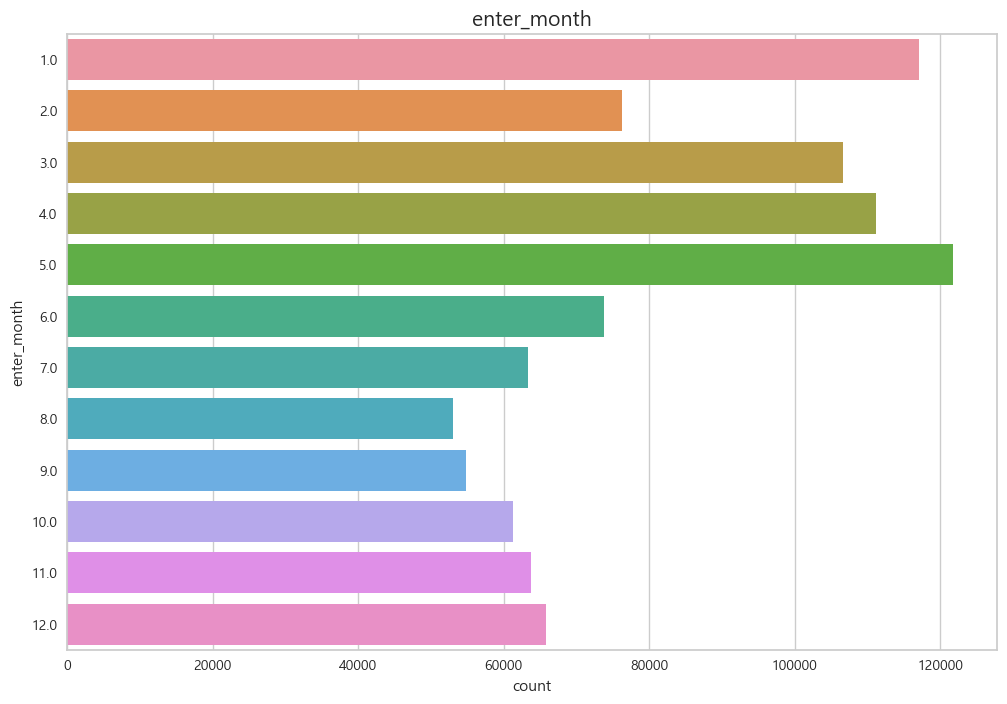

In [95]:
sns.countplot(y = 'enter_month', data = user_spec)
plt.title('enter_month', size = 15)
plt.show()

In [96]:
user_spec.enter_month.value_counts()

5.0     121746
1.0     117008
4.0     111222
3.0     106628
2.0      76264
6.0      73739
12.0     65864
11.0     63799
7.0      63305
10.0     61320
9.0      54810
8.0      53048
Name: enter_month, dtype: int64

#### enter_birth

In [97]:
user_spec.enter_birth = user_spec.enter_year - user_spec.birth_year

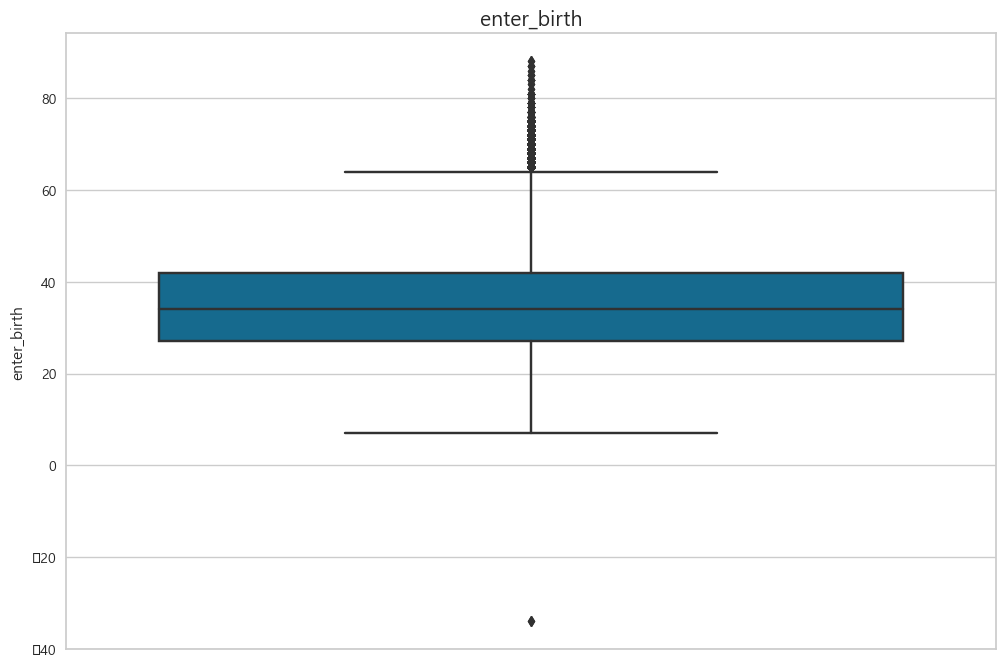

In [98]:
sns.boxplot(y = 'enter_birth', data = user_spec)
plt.title('enter_birth', size = 15)
plt.show()

In [99]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn             417763
personal_rehabilitation_complete_yn    843993
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                                  0
enter_month                                 0
enter_birth                                 0
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

In [100]:
user_spec.loc[user_spec['enter_birth']<15,'enter_year'] = user_spec.loc[user_spec['enter_birth']<15,'birth_year']+user_spec_train['enter_birth'].median() 
user_spec.loc[user_spec['enter_year']>2022,'enter_year'] = 2021
user_spec.loc[user_spec['enter_birth']<15,'enter_birth'] = 15

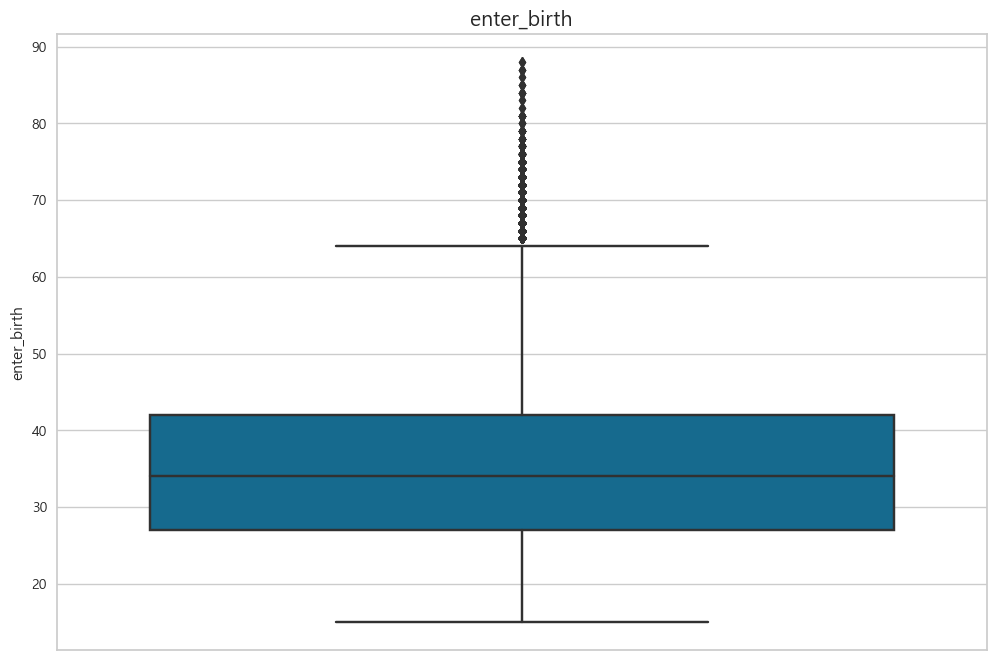

In [101]:
sns.boxplot(y = 'enter_birth', data = user_spec)
plt.title('enter_birth', size = 15)
plt.show()

### Personal_rehabilitation_yn

In [102]:
user_spec.personal_rehabilitation_yn = user_spec.personal_rehabilitation_yn.fillna(0)

### Personal_rehabilitation_complete_yn

In [103]:
user_spec.personal_rehabilitation_complete_yn = user_spec.personal_rehabilitation_complete_yn.fillna(0)

In [104]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                                  0
enter_month                                 0
enter_birth                                 0
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

### existing_loan_cnt

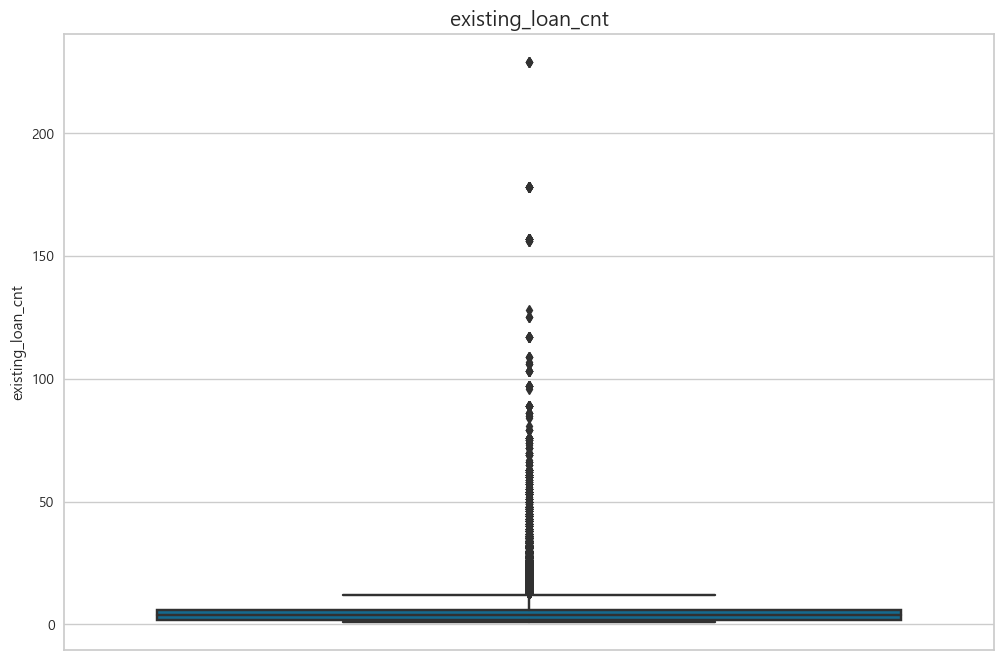

In [105]:
sns.boxplot(y = 'existing_loan_cnt', data = user_spec)
plt.title('existing_loan_cnt', size = 15)
plt.show()

### existing_loan_amt

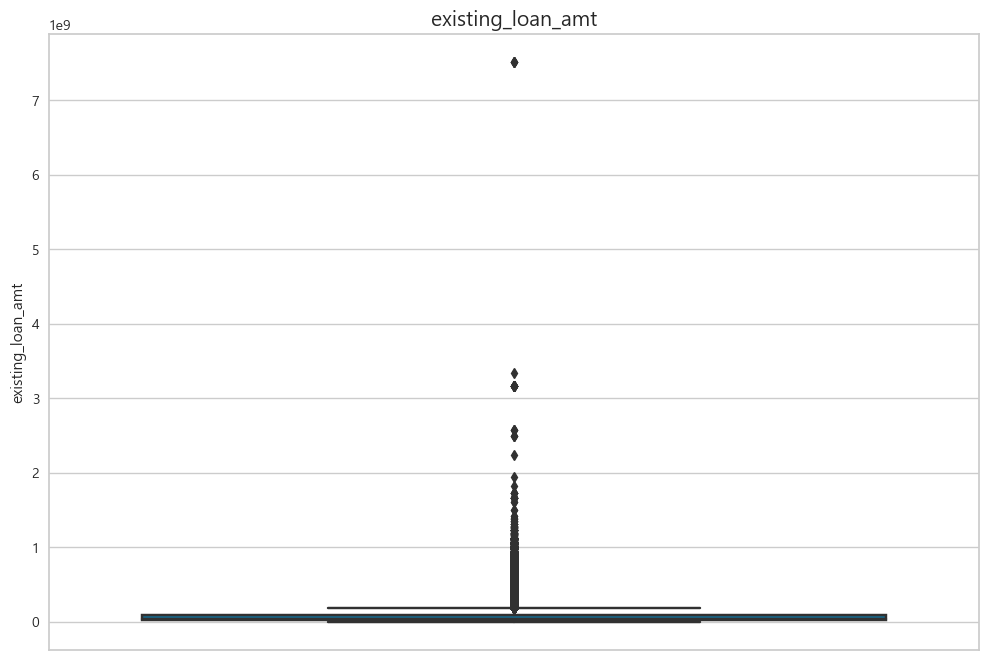

In [106]:
sns.boxplot(y = 'existing_loan_amt', data = user_spec)
plt.title('existing_loan_amt', size = 15)
plt.show()

- credit_score, existing_loan_cnt,amt -> knn_imputer

### Knn Imputer V2

In [107]:
user_spec.isnull().sum()

application_id                              0
user_id                                     0
insert_time                                 0
credit_score                            69483
yearly_income                               0
income_type                                 0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                      146290
existing_loan_amt                      225046
enter_year                                  0
enter_month                                 0
enter_birth                                 0
month                                       0
birth_year                                  0
gender                                   6891
dtype: int64

In [108]:
user_spec_train = user_spec[user_spec['month'] <6].reset_index(drop=True)
loan_result_train = loan_result[loan_result['month'] <6].reset_index(drop=True)
log_data_train = log_data[log_data['month'] <6].reset_index(drop=True)

user_spec_test = user_spec[user_spec['month'] ==6].reset_index(drop=True)
loan_result_test = loan_result[loan_result['month'] ==6].reset_index(drop=True)
log_data_test = log_data[log_data['month'] ==6].reset_index(drop=True)

In [109]:
user_spec.shape

(968753, 20)

In [110]:
user_spec_train.shape

(728884, 20)

In [111]:
knn_col = ['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']

In [112]:
scaler = MinMaxScaler().fit(user_spec_train[knn_col])

In [113]:
train_knn = scaler.transform(user_spec_train[knn_col])

In [114]:
test_knn = scaler.transform(user_spec[knn_col])

In [115]:
imputer = KNNImputer(n_neighbors = 5).fit(train_knn)

In [116]:
knn_test = imputer.transform(test_knn)

In [117]:
knn_test_scaler = scaler.inverse_transform(knn_test)

In [118]:
knn_df = pd.DataFrame(knn_test_scaler,columns = knn_col);knn_df

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt
0,870.0,30000000.0,30000000.0,1.0,27000000.0
1,710.0,30000000.0,10000000.0,5.0,15000000.0
2,820.0,62000000.0,2000000.0,7.0,344000000.0
3,630.0,36000000.0,5000000.0,1.0,16000000.0
4,590.0,45000000.0,15000000.0,1.0,20000000.0
...,...,...,...,...,...
968748,590.0,25000000.0,5000000.0,11.2,68800000.0
968749,980.0,20000000.0,50000000.0,1.0,65600000.0
968750,750.0,75000000.0,100000000.0,8.0,200000000.0
968751,640.0,50000000.0,10000000.0,10.0,117000000.0


In [119]:
user_spec.credit_score = knn_df.credit_score
user_spec.existing_loan_cnt = knn_df.existing_loan_cnt
user_spec.existing_loan_amt = knn_df.existing_loan_amt

In [120]:
user_spec.isnull().sum()

application_id                            0
user_id                                   0
insert_time                               0
credit_score                              0
yearly_income                             0
income_type                               0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_yn                0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
enter_year                                0
enter_month                               0
enter_birth                               0
month                                     0
birth_year                                0
gender                                 6891
dtype: int64

In [121]:
user_spec.shape

(968753, 20)

### Gender

- Feature
    - 다 갖다 씀
    - Model : Pycaret Model에서 성능 높은 모델로 채우자

#### Pycaret

In [122]:
gender_df = user_spec[user_spec.gender.notna()]
gender_train = gender_df[gender_df.month < 6]
gender_test = user_spec[user_spec.gender.isna()].drop('gender',axis=1)

In [123]:
exp_clf = setup(data = gender_train, target = 'gender', session_id=123)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(724051, 20)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [124]:
best_model = compare_models(sort = "F1",n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8361,0.9030,0.9449,0.8347,0.8864,0.5960,0.6110,19.6180
dt,Decision Tree Classifier,0.7918,0.7636,0.8431,0.8483,0.8457,0.5255,0.5255,2.0730
et,Extra Trees Classifier,0.7525,0.8068,0.9485,0.7512,0.8384,0.3390,0.3852,29.8000
catboost,CatBoost Classifier,0.7568,0.7949,0.8976,0.7776,0.8333,0.3927,0.4068,22.7730
xgboost,Extreme Gradient Boosting,0.7480,0.7810,0.8923,0.7713,0.8274,0.3697,0.3835,22.6420
lightgbm,Light Gradient Boosting Machine,0.7380,0.7650,0.8947,0.7605,0.8222,0.3369,0.3535,1.3120
gbc,Gradient Boosting Classifier,0.7258,0.7462,0.8951,0.7489,0.8155,0.2980,0.3167,33.3530
ada,Ada Boost Classifier,0.7179,0.7275,0.8803,0.7478,0.8086,0.2858,0.3000,6.8810
lr,Logistic Regression,0.6769,0.5879,1.0000,0.6769,0.8074,0.0000,0.0000,2.9810
dummy,Dummy Classifier,0.6769,0.5000,1.0000,0.6769,0.8074,0.0000,0.0000,0.0980


In [125]:
prediction = predict_model(best_model, data = gender_test)

In [126]:
user_spec.loc[user_spec.gender.isna(),'gender']= prediction.Label

In [127]:
user_spec.gender = pd.to_numeric(user_spec.gender)

In [128]:
user_spec.gender.unique()

array([1., 0.])

In [129]:
user_spec.isna().sum()

application_id                         0
user_id                                0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
enter_year                             0
enter_month                            0
enter_birth                            0
month                                  0
birth_year                             0
gender                                 0
dtype: int64

#### Deployment CSV

In [136]:
user_spec.to_csv('../Data/user_spec_clansing.csv',index=False)

### loan_limit

In [170]:
bank_id = loan_result[loan_result.loan_limit.isna()].bank_id.unique().tolist()

In [173]:
ll_df = loan_result.groupby('bank_id')['loan_limit'].mean().reset_index()
ll_df.loan_limit = pd.to_numeric(ll_df.loan_limit)

In [217]:
for idd in bank_id:
     loan_result.loc[(loan_result.bank_id == idd) & (loan_result['loan_limit'].isna()),'loan_limit'] = int(ll_df[ll_df.bank_id == idd]['loan_limit'].values[0])

In [218]:
loan_result.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                   7495
is_applied               3257239
dtype: int64

### loan_rate

In [219]:
bank_id = loan_result[loan_result.loan_rate.isna()].bank_id.unique().tolist()

In [220]:
ll_df = loan_result.groupby('bank_id')['loan_rate'].mean().reset_index()
ll_df.loan_rate = pd.to_numeric(ll_df.loan_rate)

In [221]:
for idd in bank_id:
     loan_result.loc[(loan_result.bank_id == idd) & (loan_result['loan_rate'].isna()),'loan_rate'] = int(ll_df[ll_df.bank_id == idd]['loan_rate'].values[0])

In [222]:
loan_result.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3257239
dtype: int64

#### Deployment CSV

In [223]:
loan_result.to_csv('../Data/loan_result_clansing.csv',index=False)

### Mp_Os & Os_Version

In [225]:
log_data.drop(['mp_os','mp_app_version'],axis=1,inplace=True)

In [226]:
log_data.isna().sum()

user_id      0
event        0
timestamp    0
date_cd      0
dtype: int64

#### Deployment CSV

In [227]:
log_data.to_csv('../Data/log_data_clansing.csv',index=False)